<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a Python Program to implement Agglomerative Clustering**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [6]:
#Load the Wine dataset
x=pd.read_csv("/content/CC GENERAL.csv")
x.drop('CUST_ID', axis = 1,inplace=True)
x.ffill(inplace=True)
print(x.iloc[:5,:4])

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES
0    40.900749           0.818182      95.40              0.00
1  3202.467416           0.909091       0.00              0.00
2  2495.148862           1.000000     773.17            773.17
3  1666.670542           0.636364    1499.00           1499.00
4   817.714335           1.000000      16.00             16.00


In [12]:
#Preprocessing the data
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_normal=pd.DataFrame(normalize(x_scale))
print(x_normal.iloc[:,:5])

             0         1         2         3         4
0    -0.312038 -0.106331 -0.181129 -0.152156 -0.148808
1     0.219928  0.037539 -0.131224 -0.099751 -0.127038
2     0.126684  0.146785 -0.030505  0.030851 -0.128792
3     0.020571 -0.426063  0.097223  0.228832 -0.190449
4    -0.151630  0.218959 -0.195282 -0.146778 -0.192118
...        ...       ...       ...       ...       ...
8945 -0.146906  0.103137 -0.066350 -0.071056 -0.026406
8946 -0.151150  0.105477 -0.067009 -0.072668 -0.025006
8947 -0.156989 -0.039327 -0.085230 -0.075682 -0.062527
8948 -0.154334 -0.038414 -0.097250 -0.073925 -0.094148
8949 -0.115217 -0.178896  0.008481  0.060716 -0.091472

[8950 rows x 5 columns]


In [13]:
#Reducing the dimensionality of the Data
pca=PCA(n_components=2)
x_principal=pca.fit_transform(x_normal)
x_principal=pd.DataFrame(x_principal,columns=['P1','P2'])
print(x_principal)

            P1        P2
0    -0.489949 -0.679976
1    -0.519099  0.544827
2     0.330633  0.268879
3    -0.481656 -0.097611
4    -0.563512 -0.482506
...        ...       ...
8945  0.328693 -0.198293
8946  0.259752 -0.176867
8947  0.188818 -0.248155
8948 -0.313093 -0.171112
8949  0.012841  0.098423

[8950 rows x 2 columns]


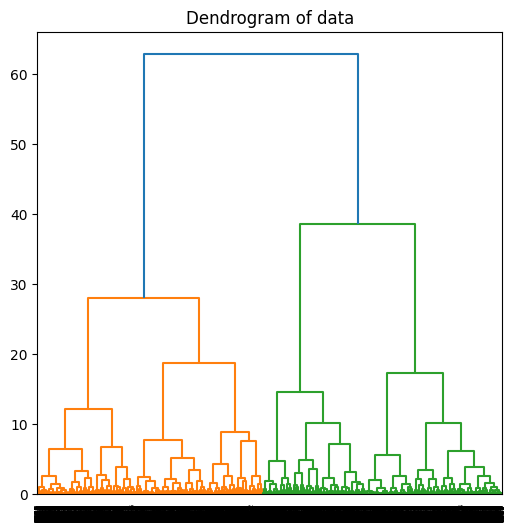

In [35]:
#Visualizing the working of the Dendrograms
plt.figure(figsize=(6,6))
plt.title('Dendrogram of data')
Dendrogram = shc.dendrogram((shc.linkage(x_principal, method ='ward')))

In [33]:
#Apply Agglomerative clustering
model=AgglomerativeClustering(n_clusters=3)
predic=model.fit_predict(x_principal)

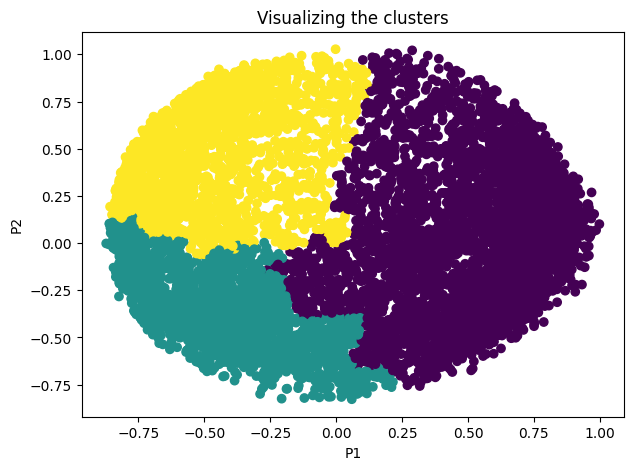

In [34]:
#Visualizing the clustering
plt.figure(figsize=(7,5))
plt.scatter(x_principal['P1'],x_principal['P2'],c=predic)
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Visualizing the clusters')
plt.show()